## 1. Install Required Dependencies

Install the Ultralytics YOLO library and other required packages. If running on Colab, uncomment the first line.

In [1]:
# 1. Install dependencies
# We pin numpy<2.0 because the current version of ultralytics/opencv has conflicts with NumPy 2.x
!pip install "numpy<2.0" ultralytics opencv-python matplotlib

# 2. Check for GPU
import torch
print(f"Setup Complete. GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("WARNING: You are running on CPU. Training will be very slow. Enable GPU accelerator in settings.")

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5

## 2. Import Libraries

Import all necessary libraries for the pipeline.

In [2]:
import os
import yaml
from ultralytics import YOLO
from pathlib import Path

# --- CONFIGURATION ---
# Define the root path to your input dataset
# based on your previous logs:
INPUT_DIR = Path('/kaggle/input/scratch-bb-ds/yolo_dataset')

# Define where we want to save our config and results
WORKING_DIR = Path('/kaggle/working')

# --- CREATE DATA.YAML ---
# YOLO needs a YAML file to know where the images are.
# We generate this dynamically to ensure paths are correct.
yaml_content = {
    'path': str(INPUT_DIR),       # Base path
    'train': 'train/images',      # Train folder (relative to path)
    'val': 'test/images',         # Val folder (using test if val is missing)
    'test': 'test/images',        # Test folder
    'names': {                    # Class names dictionary
        0: 'defect'
    }
}

yaml_path = WORKING_DIR / 'data.yaml'

with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

print(f"Configuration file created at: {yaml_path}")
print("-" * 20)
print(yaml.dump(yaml_content))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Configuration file created at: /kaggle/working/data.yaml
--------------------
names:
  0: defect
path: /kaggle/input/scratch-bb-ds/yolo_dataset
test: test/images
train: train/images
val: test/images



In [3]:
# 1. Load the Model
# 'yolov11n.pt' will download automatically. 
# 'n' stands for Nano (fastest). Use 's' or 'm' if you need higher accuracy but have a slower GPU.
model = YOLO('yolov8n.pt') 

print("Model loaded. Starting training...")

# 2. Run Training
# epochs: How many times to see the whole dataset (50 is a good start)
# imgsz: Standard YOLO image size is 640
# batch: Reduce to 16 or 8 if you run out of GPU memory
results = model.train(
    data=str(yaml_path),
    epochs=60,             
    imgsz=640,
    batch=16,
    project='runs/detect', # Save results here
    name='yolo_custom',    # Name of this specific run
    exist_ok=True,         # Overwrite folder if it exists
    plots=True             # Automatically save training graphs
)

Model loaded. Starting training...
Ultralytics 8.3.230 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        103        248      0.715      0.746      0.774      0.439
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/yolo_custom


## 4. Load and Prepare Input Data

Load sample images from the dataset for detection and visualization.

Found 103 images.


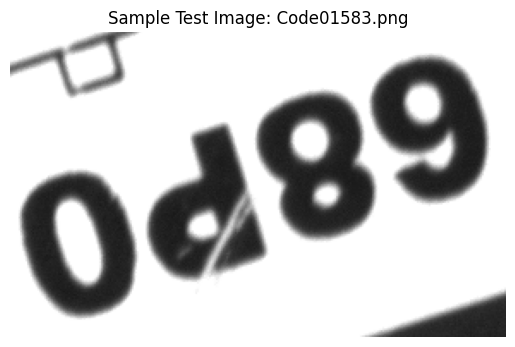

In [4]:
# List a few images from the test set
from pathlib import Path

# Define the missing variable
dataset_dir = '/kaggle/input/scratch-bb-ds/yolo_dataset'

# Now your original code will work:
image_dir = Path(dataset_dir) / 'test' / 'images'
image_files = list(image_dir.glob('*.png')) + list(image_dir.glob('*.jpg'))

print(f"Found {len(image_files)} images.")

from PIL import Image
import matplotlib.pyplot as plt  # You likely need this for 'plt' as well

# Now run your code:
sample_image_path = image_files[0]
img = Image.open(sample_image_path)

plt.imshow(img)
plt.title(f"Sample Test Image: {sample_image_path.name}")
plt.axis('off')
plt.show()

## 5. Run Object Detection

Use the loaded YOLOv11 model to perform object detection on the input images.

In [5]:
# Run detection
# The model AUTOMATICALLY prints the summary (e.g., "1 defect, 20ms") to the console here.
results = model(str(sample_image_path))

# REMOVED: results.print() -> This causes an AttributeError in YOLOv8/11

# Get the first result (since we only passed one image)
result = results[0]

# Access the boxes
boxes = result.boxes

print(f"Detected {len(boxes)} object(s).")


image 1/1 /kaggle/input/scratch-bb-ds/yolo_dataset/test/images/Code01583.png: 416x640 1 defect, 36.0ms
Speed: 1.6ms preprocess, 36.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Detected 1 object(s).


## 6. Visualize Detection Results

Display the detection results with bounding boxes, labels, and confidence scores using matplotlib.

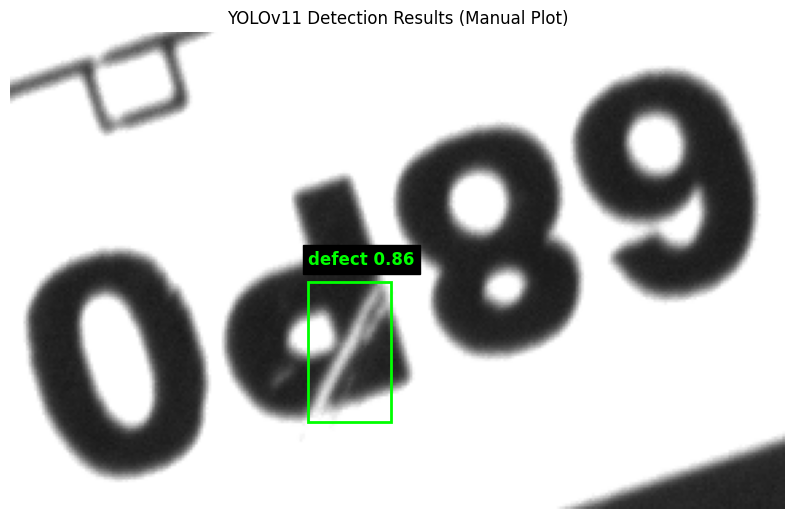

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ensure the image is loaded (in case the variable was lost)
# Replace 'sample_image_path' with the actual path string if this fails
if 'sample_image_path' not in locals():
    print("Error: 'sample_image_path' variable is missing. Please define it first.")
else:
    img = np.array(Image.open(sample_image_path))
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    # Iterate through detections
    # 'boxes' comes from results[0].boxes
    for box in boxes:
        # Extract coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        
        # Extract confidence and class
        conf = float(box.conf[0].cpu().numpy())
        cls = int(box.cls[0].cpu().numpy())
        
        # Create label (You can use model.names[cls] to get the actual class name)
        label = f"defect {conf:.2f}"
        
        # Draw box
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='lime', linewidth=2)
        ax.add_patch(rect)
        
        # Draw label background and text
        ax.text(x1, y1-5, label, color='lime', fontsize=12, weight='bold', 
                backgroundcolor='black', verticalalignment='bottom')

    plt.axis('off')
    plt.title('YOLOv11 Detection Results (Manual Plot)')
    plt.show()

Loading model from: /kaggle/working/runs/detect/yolo_custom/weights/best.pt
Running inference...
Results saved to /kaggle/working/runs/detect/final_test
Inference complete.

Displaying 10 random results:


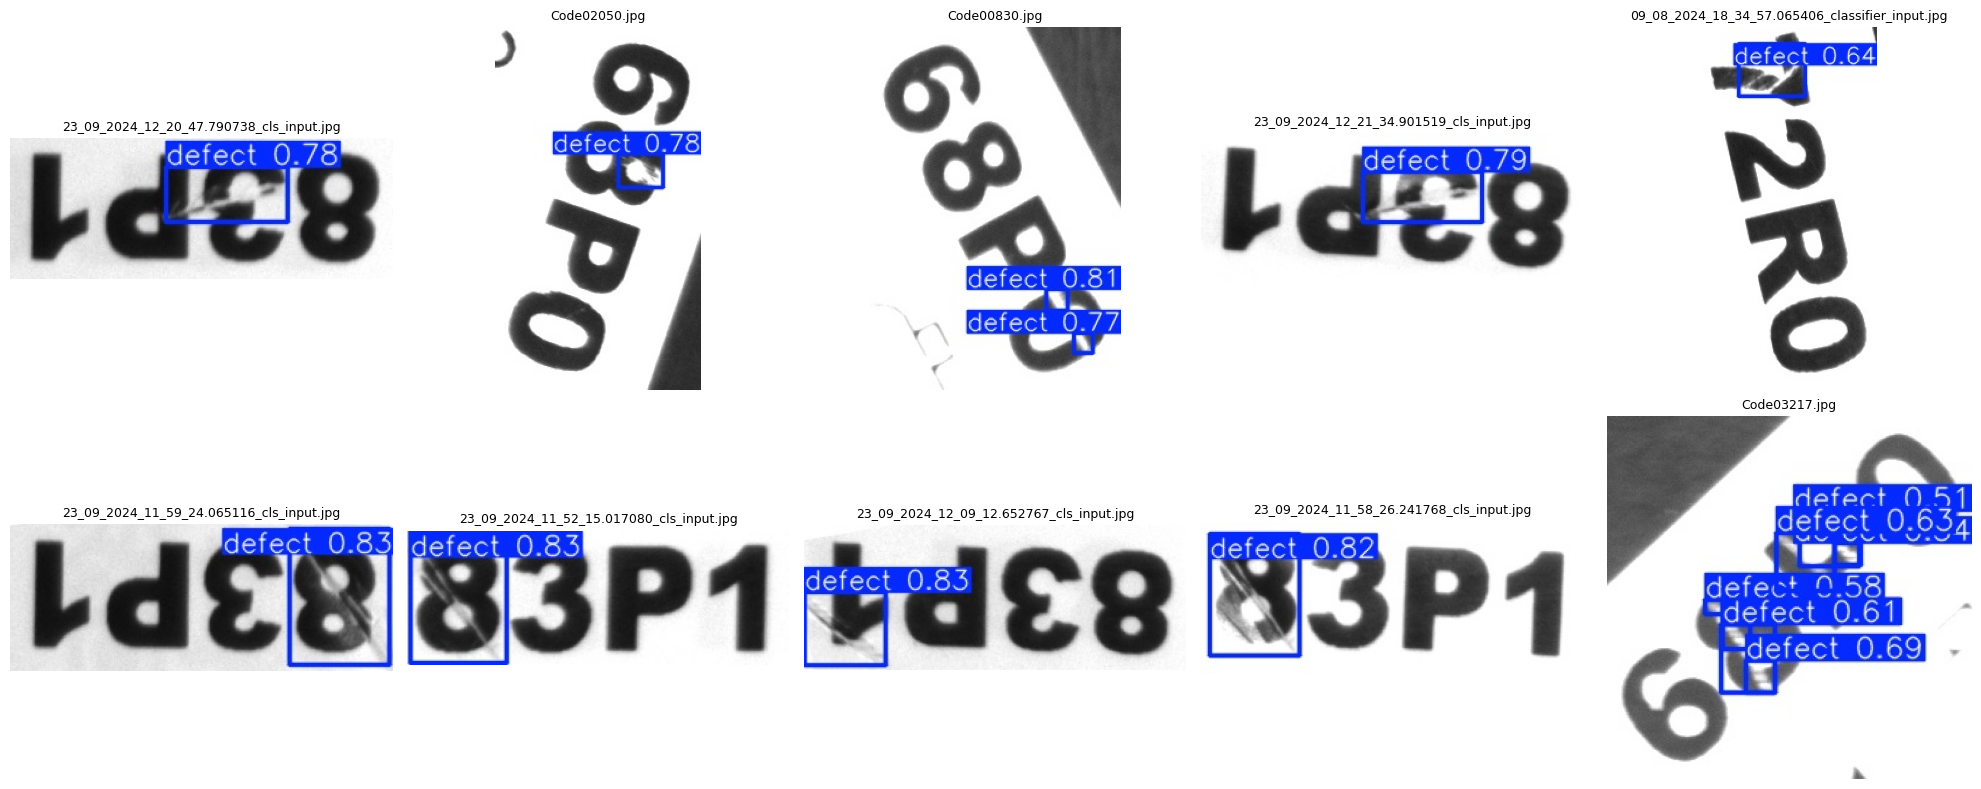

In [7]:
import os
import glob
import random
import math
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# --- 1. CONFIGURATION ---
# Path to the best model you just trained
# (Adjust this path if your training run name was different)
best_model_path = '/kaggle/working/runs/detect/yolo_custom/weights/best.pt'

# Path to the test images
test_images_dir = '/kaggle/input/scratch-bb-ds/yolo_dataset/test/images'

# --- 2. LOAD MODEL & RUN INFERENCE ---
if os.path.exists(best_model_path):
    print(f"Loading model from: {best_model_path}")
    model = YOLO(best_model_path)
    
    # Run inference on the whole folder
    # We save results to 'runs/detect/final_test' so we can load them for plotting
    print("Running inference...")
    model.predict(
        source=test_images_dir,
        conf=0.25,
        save=True,
        project='runs/detect',
        name='final_test',
        exist_ok=True,
        verbose=False # Set to True if you want to see logs for every image
    )
    print("Inference complete.")
    
    # --- 3. VISUALIZE 10 RANDOM RESULTS ---
    # Locate the saved images (YOLO saves them in project/name)
    output_dir = '/kaggle/working/runs/detect/final_test'
    saved_files = glob.glob(f"{output_dir}/*.jpg") + glob.glob(f"{output_dir}/*.png")
    
    if saved_files:
        num_to_show = min(10, len(saved_files))
        print(f"\nDisplaying {num_to_show} random results:")
        
        selected_files = random.sample(saved_files, num_to_show)
        
        # Dynamic grid calculation
        cols = 5
        rows = math.ceil(num_to_show / cols)
        
        plt.figure(figsize=(20, 4 * rows))
        
        for i, file_path in enumerate(selected_files):
            # Read image (OpenCV reads in BGR)
            img = cv2.imread(file_path)
            # Convert to RGB for Matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(os.path.basename(file_path), fontsize=9)
            
        plt.tight_layout()
        plt.show()
    else:
        print("No output files found. Inference might have failed.")

else:
    print(f"Error: Model file not found at {best_model_path}")
    print("Please check if the training cell ran successfully.")